In [1]:
#Importar librerias necesarias
# en el archivo readme encontraras como deben estar los datos de produccion y consumo ademas hay una plantilla entre los archivos

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sb

In [3]:
#agregar la direccion de donde se encuentran los datos de produccion y consumo

In [4]:
basepath = "C:/Users/JECH_19/Documents/ciencia datos python"

In [5]:
#poner el nombre del archivo con su extension

In [6]:
archivo1= basepath + "/prueba.xlsx"

In [7]:
#leeremos el archivo como un pandas dataframe

In [8]:
dfind = pd.read_excel(archivo1)


In [9]:
#observaremos las columnas que tenemos

In [10]:
dfind.head()

,Año,Mes,Consumo en Kpc,Producción Ton.
0,1998,Enero,134880,2385730
1,1998,Febrero,138240,2040070
2,1998,Marzo,138480,2161680
3,1998,Abril,122880,2103370
4,1998,Mayo,155280,2401320


In [11]:
#con la libreria seaborn observaremos los datos con una linea de regresion

<AxesSubplot:xlabel='Producción Ton.', ylabel='Consumo en Kpc'>

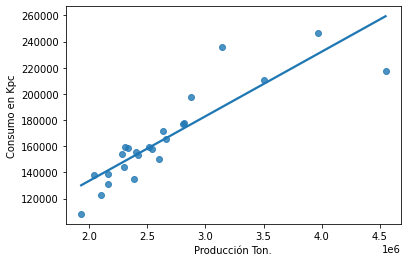

In [12]:
sb.regplot(x='Producción Ton.', y='Consumo en Kpc', ci=None, data=dfind)

In [13]:
#sacaremos las ecuaciones de la linea de regresion, como el intercepto con eje, pendiente, y valor de R cuadrado

In [14]:
x = dfind['Producción Ton.']
y = dfind['Consumo en Kpc']
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(x, y)
r2 = r_value1**2
slope1=round(slope1, 4)
intercept1=round(intercept1)
print("pendiente:",slope1) 
print("interseccion eje:", intercept1)
print("R2:", r2)


pendiente: 0.0493
interseccion eje: 34995
R2: 0.7753139270861864


In [15]:
#se calculan y añaden las siguientes columnas con sus respectivos valores y se saca la desviacion estandar

In [16]:
dfind['Ecalculado']=((dfind['Producción Ton.']*slope1)+intercept1)
dfind['E^2']=dfind['Consumo en Kpc']**2
dfind['Ei*Pi']=dfind['Consumo en Kpc']*dfind['Producción Ton.']

suma_Ei= dfind['Consumo en Kpc'].sum()
suma_E2=dfind['E^2'].sum()
suma_EixPi=dfind['Ei*Pi'].sum()
print('sumatoria Ei=', suma_Ei)
print('sumatoria E^2=', suma_E2)
print('sumatoria Ei*Pi=', suma_EixPi)

des_Est=((suma_E2-(intercept1*suma_Ei)-(slope1*suma_EixPi))/(dfind.shape[0]-2))**0.5
des_Est=round(des_Est, 5)
print('Des. estan',des_Est)


sumatoria Ei= 3966621
sumatoria E^2= 683143852105
sumatoria Ei*Pi= 10914732989285
Des. estan 16835.58709


In [17]:
#se eliminaran los datos mas irregulares respetando que no se pueden eliminar mas del 30% de los datos 

In [18]:
por_dt_eliminar = 40
x=4
while (por_dt_eliminar < 15 or por_dt_eliminar > 30):
    
   dfind['E+(x*Sy,x)']=dfind['Ecalculado']+(des_Est*x)
   dfind['E-(x*Sy,x)']=dfind['Ecalculado']-(des_Est*x)

   dfind['(E+Sy,x)-Ei']=dfind['E+(x*Sy,x)']-dfind['Consumo en Kpc']
   dfind['Ei-(E-Sy,x)']=dfind['Consumo en Kpc']-dfind['E-(x*Sy,x)']

   dffiltro = dfind.drop(dfind[dfind['(E+Sy,x)-Ei']<0].index)
   dffiltro = dffiltro.drop(dffiltro[dffiltro['Ei-(E-Sy,x)']<0].index)
   dffiltro.reset_index(drop=True, inplace=True)

   dt_eliminar = dfind.shape[0]-dffiltro.shape[0]
   por_dt_eliminar=(dt_eliminar/dfind.shape[0])*100
   print(por_dt_eliminar,'%')
   print(dt_eliminar)
   print('x',x)
   x = x-0.2
   


0.0 %
0
x 4
0.0 %
0
x 3.8
0.0 %
0
x 3.5999999999999996
0.0 %
0
x 3.3999999999999995
0.0 %
0
x 3.1999999999999993
0.0 %
0
x 2.999999999999999
0.0 %
0
x 2.799999999999999
4.166666666666666 %
1
x 2.5999999999999988
8.333333333333332 %
2
x 2.3999999999999986
8.333333333333332 %
2
x 2.1999999999999984
8.333333333333332 %
2
x 1.9999999999999984
8.333333333333332 %
2
x 1.7999999999999985
8.333333333333332 %
2
x 1.5999999999999985
8.333333333333332 %
2
x 1.3999999999999986
16.666666666666664 %
4
x 1.1999999999999986


In [19]:
print(dfind)

     Año         Mes  Consumo en Kpc  Producción Ton.   Ecalculado  \
0   1998       Enero          134880          2385730  152611.4890   
1   1998     Febrero          138240          2040070  135570.4510   
2   1998       Marzo          138480          2161680  141565.8240   
3   1998       Abril          122880          2103370  138691.1410   
4   1998        Mayo          155280          2401320  153380.0760   
5   1998       Junio          157920          2537565  160096.9545   
6   1998       Julio          159600          2303359  148550.5987   
7   1998      Agosto          177600          2811775  173615.5075   
8   1998  Septiembre          158880          2337090  150213.5370   
9   1998     Octubre          131040          2157733  141371.2369   
10  1998   Noviembre          143760          2300890  148428.8770   
11  1998   Diciembre          153840          2282175  147506.2275   
12  1999       Enero          150480          2595580  162957.0940   
13  1999     Febrero

In [20]:
# con seaborn y matplotlib graficaremos la linea base, el limite superior e inferior del consumo.

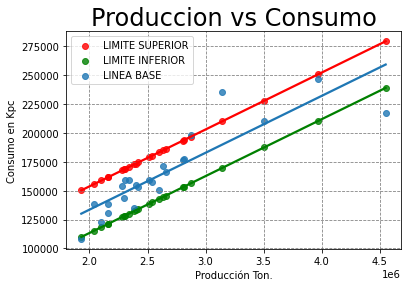

In [21]:
fig, ax = plt.subplots()
sb.regplot(x='Producción Ton.', y='E+(x*Sy,x)', data=dfind, ax=ax, color='r',label = "LIMITE SUPERIOR")
sb.regplot(x='Producción Ton.', y='E-(x*Sy,x)', data=dfind, ax=ax, color='g',label = "LIMITE INFERIOR")
sb.regplot(x='Producción Ton.', y='Consumo en Kpc',ci=None, data=dfind, ax=ax,label = "LINEA BASE")
ax.grid(axis = 'both', color = 'gray', linestyle = 'dashed')
ax.set_title( "Produccion vs Consumo" , size = 24 )
plt.legend()
plt.show()

In [22]:
#creamos el dataframe con los datos que se eliminaron y borramos las columnas que ya no se utilizaran.

In [23]:
df_lin_met= dffiltro.drop(['Ecalculado', 'E^2', 'Ei*Pi','E+(x*Sy,x)','E-(x*Sy,x)','(E+Sy,x)-Ei','Ei-(E-Sy,x)'], axis=1)
print(df_lin_met)

     Año         Mes  Consumo en Kpc  Producción Ton.
0   1998       Enero          134880          2385730
1   1998     Febrero          138240          2040070
2   1998       Marzo          138480          2161680
3   1998       Abril          122880          2103370
4   1998        Mayo          155280          2401320
5   1998       Junio          157920          2537565
6   1998       Julio          159600          2303359
7   1998      Agosto          177600          2811775
8   1998  Septiembre          158880          2337090
9   1998     Octubre          131040          2157733
10  1998   Noviembre          143760          2300890
11  1998   Diciembre          153840          2282175
12  1999       Enero          150480          2595580
13  1999       Marzo          153120          2420295
14  1999       Abril          159720          2509785
15  1999        Mayo          165817          2656455
16  1999       Julio          176880          2804464
17  1999      Agosto        

In [24]:
#sacaremos las ecuaciones de la linea de regresion, como el intercepto con eje, pendiente, y valor de R cuadrado

In [25]:
x = df_lin_met['Producción Ton.']
y = df_lin_met['Consumo en Kpc']
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(x, y)
r22 = r_value2**2
print("pendiente:",slope2) 
print("interseccion eje:", intercept2)
print("R2:", r22)

pendiente: 0.0579470939089483
interseccion eje: 12832.462825853232
R2: 0.9243316228473009


In [26]:
#se agregan las siguientes columnas con sus valores calculados

In [27]:
df_lin_met['Consumo teorico']=(slope2*df_lin_met['Producción Ton.']+intercept2)


In [28]:
df_lin_met['Real-Teorico']=df_lin_met['Consumo en Kpc']-df_lin_met['Consumo teorico']

In [29]:
#se seleccionan los valores superiores a cero y se eliminan

In [30]:
df_lin_met['Diferencia al cuadrado']=df_lin_met['Real-Teorico'].clip(upper=0)


In [31]:
#Se guardan los datos negativos en un dataframe auxiliar y se elevan al cuarado

In [32]:
dfaux=df_lin_met['Diferencia al cuadrado']**2


In [33]:
#se reinicia el index para que comience de 0 y se saca la cantidad de datos que tenemos

In [34]:
dfaux = dfaux.drop(dfaux[dfaux==0].index)
dfaux.reset_index(drop=True, inplace=True)
val_neg=dfaux.shape[0]


In [35]:
#se saca la varianza y la desviacion estandar

In [36]:
varianza=(dfaux.sum())/val_neg

In [37]:
D_estandar=varianza**0.5
print("varianza= ",varianza)
print("Des. Estandar= ",D_estandar)

varianza=  81427386.48336557
Des. Estandar=  9023.71245571165


In [38]:
df_lin_met['Linea meta'] = ((slope2*df_lin_met['Producción Ton.'])+D_estandar) 


In [39]:
# se graafica la linea base y la linea meta

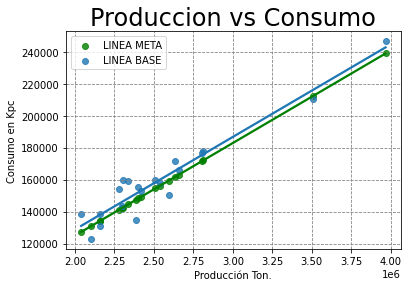

In [40]:
fig, ax = plt.subplots()
sb.regplot(x='Producción Ton.', y='Linea meta', data=df_lin_met, ax=ax, color='g',label = "LINEA META")
sb.regplot(x='Producción Ton.', y='Consumo en Kpc',ci=None, data=df_lin_met, ax=ax,label = "LINEA BASE")
ax.grid(axis = 'both', color = 'gray', linestyle = 'dashed')
ax.set_title( "Produccion vs Consumo" , size = 24 )
plt.legend()
plt.show()

In [41]:
# se calcula el ahrro por año y por mes

In [42]:
dlt_E0=intercept2-D_estandar
prc_enrg=1000
Ahrr_mes=dlt_E0*prc_enrg
Ahrr_año=Ahrr_mes*12


In [43]:
# se crea un nuevo data frame correspondiente al indice de consumo, se eliminan las columnas que no se utilizaran y se agregan las nuevas calculadas

In [44]:
df_IC= dffiltro.drop(['Ecalculado', 'E^2', 'Ei*Pi','E+(x*Sy,x)','E-(x*Sy,x)','(E+Sy,x)-Ei','Ei-(E-Sy,x)'], axis=1)

In [45]:
df_IC['IC Real']=df_IC['Consumo en Kpc']/df_IC['Producción Ton.']


In [46]:
df_IC['IC Teorico']=slope2+(intercept2/df_IC['Producción Ton.'])


In [47]:
df_IC['2*E0/P^3']= (2*intercept2)/(df_IC['Producción Ton.'])**3


In [48]:
# se grafica la prodccion vs la segunda derivada

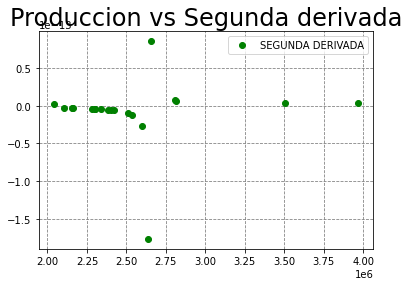

In [49]:
fig, ax = plt.subplots()
x=df_IC['Producción Ton.']
y=df_IC['2*E0/P^3']
plt.plot(x, y,'o' ,color='g',label = "SEGUNDA DERIVADA")
ax.grid(axis = 'both', color = 'gray', linestyle = 'dashed')
ax.set_title( "Produccion vs Segunda derivada" , size = 24 )
plt.legend()
plt.show()

In [50]:
#se sacan los valore maximo de X y de Y, tambien el minimo de X

In [51]:
maxx=round(df_IC['Producción Ton.'].max())
minx=round(df_IC['Producción Ton.'].min())
maxy=round(df_IC['IC Real'].max())
maxx
minx
maxy

0

In [52]:
#se grafica la segunda derivada con una linea de tendencia polinomica

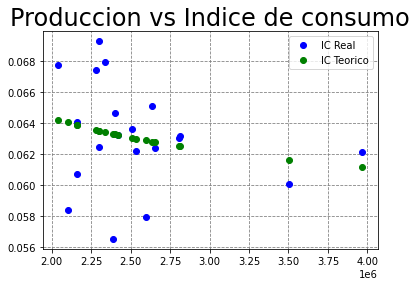

In [53]:
fig, ax = plt.subplots()
x=df_IC['Producción Ton.']
y=df_IC['IC Real']
y1=df_IC['IC Teorico']
modelo = np.poly1d (np.polyfit (x, y, 2))
plt.plot(x, y,'o' ,color='b',label = "IC Real")
plt.plot(x, y1,'o' ,color='g',label = "IC Teorico")
polilinea=np.linspace(minx,maxx,maxy)
ax.grid(axis = 'both', color = 'gray', linestyle = 'dashed')
ax.set_title( "Produccion vs Indice de consumo" , size = 24 )
plt.plot(polilinea,modelo(polilinea))
plt.legend()
plt.show()

In [54]:
mean_consumo= df_IC['Consumo en Kpc'].mean()
mean_produccion=df_IC['Producción Ton.'].mean()

min_IC_Teorico=df_IC['IC Teorico'].min()
df_val_min=df_IC[df_IC['IC Teorico']==min_IC_Teorico]

min_IC_Real=df_val_min['IC Real'].values[0]
val_prod_segun_IC_min=df_val_min['Producción Ton.'].values[0]
pot_ahorro=abs(mean_produccion*(min_IC_Real-min_IC_Teorico))
porcen_ahorr=(pot_ahorro/mean_consumo)*100
Ah_econo=pot_ahorro*1000
TPH=30*24


rata_critica=val_prod_segun_IC_min/TPH
rata_produccion=mean_produccion/TPH
print('promedio de consumo:',mean_consumo)
print('promedio de produccion:',mean_produccion)
print('valor minimo de IC Real:',min_IC_Real)
print('valor minimo de IC Teorico:',min_IC_Teorico)
print('potencial de ahorro:',pot_ahorro)
print('porcentaje de ahorro:',porcen_ahorr)
print('ahorro economico:',Ah_econo)
print('TPH:',TPH)
print('valor de produccion segun IC minimo:',val_prod_segun_IC_min)
print('rata critica:',rata_critica)
print('rata de produccion:',rata_produccion)

promedio de consumo: 160357.35
promedio de produccion: 2545854.8
valor minimo de IC Real: 0.062150831652082385
valor minimo de IC Teorico: 0.06118166517378672
potencial de ahorro: 2467.3571307681204
porcentaje de ahorro: 1.5386617019850481
ahorro economico: 2467357.1307681203
TPH: 720
valor de produccion segun IC minimo: 3967284
rata critica: 5510.116666666667
rata de produccion: 3535.909444444444


In [55]:
# se crea un dataframe que contine los datos originales y se crea un dataframe para el presupuesto con los datos originales

In [56]:
dforg= dfind.drop(['Ecalculado', 'E^2', 'Ei*Pi','E+(x*Sy,x)','E-(x*Sy,x)','(E+Sy,x)-Ei','Ei-(E-Sy,x)'], axis=1)
dfpresupuesto=dforg
n=len(dfpresupuesto['Producción Ton.'])
a = 0
b = 1

In [57]:
#sacaremos las ecuaciones de la linea de regresion, como el intercepto con eje, pendiente, y valor de R cuadrado

In [58]:
x3 = dforg['Producción Ton.']
y3= dforg['Consumo en Kpc']
slope3, intercept3, r_value3, p_value3, std_err3 = linregress(x3, y3)
r23 = r_value3**2
print("pendiente:",slope3) 
print("interseccion eje:", intercept3)
print("R2:", r23)

pendiente: 0.049304017512758605
interseccion eje: 34995.01718898106
R2: 0.7753139270861864


In [59]:
#se introducen la produccion que se planea para los siguientes meses

In [60]:

while a == 0:
    print('Introduzca la poduccion planeada del siguiente mes ', end='')
    p=input()
    p=int(p)
    dfpresupuesto.at[n,'produccion planeada']=p
    print('presione 0 para agregar otro mes y 1 para finalizar', end='')
    a = input() 
    a = int (a)
    n = n+1
    b = b+1
print ('xxx')

Introduzca la poduccion planeada del siguiente mes 

 1


presione 0 para agregar otro mes y 1 para finalizar

 0


Introduzca la poduccion planeada del siguiente mes 

 1


presione 0 para agregar otro mes y 1 para finalizar

 0


Introduzca la poduccion planeada del siguiente mes 

 1


presione 0 para agregar otro mes y 1 para finalizar

 0


Introduzca la poduccion planeada del siguiente mes 

 1


presione 0 para agregar otro mes y 1 para finalizar

 1


xxx


In [61]:
n1 = (n-b) + 1
while n1 != n:
    dfpresupuesto.at[n1,'consumo teorico']=(slope3*dfpresupuesto.at[n1,'produccion planeada'])+intercept3
    n1 = n1+1
    n1 = int(n1)
print ('xxx')

xxx


In [62]:
#se introduce el consumu real que tubo la empresa

In [63]:
n1 = (n-b) + 1

while n1 != n:
    print('Introduzca consumo real del mes ', end='')
    c=input()
    c=int(c)
    dfpresupuesto.at[n1,'consumo real']=c
    n1 = n1+1
    n1 = int(n1)
print ('xxx')

Introduzca consumo real del mes 

 1


Introduzca consumo real del mes 

 1


Introduzca consumo real del mes 

 1


Introduzca consumo real del mes 

 1


xxx


In [64]:
#se introduce la produccion real del mes

In [ ]:
n1 = (n-b) + 1
while n1 != n:
    print('Introduzca produccion real del mes ', end='')
    p=input()
    p = int(p)
    dfpresupuesto.at[n1,'produccion real']=p
    n1 = n1+1
    n1 = int(n1)
print ('xxx')

Introduzca produccion real del mes 

 1


Introduzca produccion real del mes 

 1


Introduzca produccion real del mes 

 1


Introduzca produccion real del mes 

 1


xxx


In [ ]:
#se añaden las siguientes columnas y se calculan los datos

In [ ]:
dfpresupuesto['Var_pres_pro']=slope3*(dfpresupuesto['produccion real']-dfpresupuesto['produccion planeada'])

In [ ]:
dfpresupuesto['E linea base']=(slope3*dfpresupuesto['produccion real'])+intercept3

In [ ]:
dfpresupuesto['Var_pres_efi']=dfpresupuesto['consumo real']-dfpresupuesto['E linea base']

In [ ]:
dfpresupuesto['Var_total']=dfpresupuesto['Var_pres_efi']+dfpresupuesto['Var_pres_pro']

In [ ]:
print(dfpresupuesto)

       Año         Mes  Consumo en Kpc  Producción Ton.  produccion planeada  \
0   1998.0       Enero        134880.0        2385730.0                  NaN   
1   1998.0     Febrero        138240.0        2040070.0                  NaN   
2   1998.0       Marzo        138480.0        2161680.0                  NaN   
3   1998.0       Abril        122880.0        2103370.0                  NaN   
4   1998.0        Mayo        155280.0        2401320.0                  NaN   
5   1998.0       Junio        157920.0        2537565.0                  NaN   
6   1998.0       Julio        159600.0        2303359.0                  NaN   
7   1998.0      Agosto        177600.0        2811775.0                  NaN   
8   1998.0  Septiembre        158880.0        2337090.0                  NaN   
9   1998.0     Octubre        131040.0        2157733.0                  NaN   
10  1998.0   Noviembre        143760.0        2300890.0                  NaN   
11  1998.0   Diciembre        153840.0  

In [ ]:
# se concluye si se fue eficiente en produccion o en consumo

In [ ]:
n1 = (n-b) + 1

while n1 != n:
    if dfpresupuesto.at[n1,'Var_pres_pro']>0 and dfpresupuesto.at[n1,'Var_pres_efi']<0:
        dfpresupuesto.at[n1,'Observacion']='Fui eficiente en produccion y eficiente en consumo'
    if dfpresupuesto.at[n1,'Var_pres_pro']<0 and dfpresupuesto.at[n1,'Var_pres_efi']<0:   
        dfpresupuesto.at[n1,'Observacion']='Fui ineficiente en produccion y eficiente en consumo'
    if dfpresupuesto.at[n1,'Var_pres_pro']>0 and dfpresupuesto.at[n1,'Var_pres_efi']>0:   
        dfpresupuesto.at[n1,'Observacion']='Fui eficiente en produccion e ineficiente en consumo'
    if dfpresupuesto.at[n1,'Var_pres_pro']<0 and dfpresupuesto.at[n1,'Var_pres_efi']>0:   
        dfpresupuesto.at[n1,'Observacion']='Fui ineficiente en produccion e ineficiente en consumo'
    if dfpresupuesto.at[n1,'Var_pres_pro']==0 and dfpresupuesto.at[n1,'Var_pres_efi']>0:   
        dfpresupuesto.at[n1,'Observacion']='produccion solicitada e ineficiente en consumo'
    if dfpresupuesto.at[n1,'Var_pres_pro']==0 and dfpresupuesto.at[n1,'Var_pres_efi']<0:   
        dfpresupuesto.at[n1,'Observacion']='produccion solicitada y eficiente en consumo'
    if dfpresupuesto.at[n1,'Var_pres_pro']>0 and dfpresupuesto.at[n1,'Var_pres_efi']==0:   
        dfpresupuesto.at[n1,'Observacion']='eficiente en produccion y eficiente en consumo'
    if dfpresupuesto.at[n1,'Var_pres_pro']<0 and dfpresupuesto.at[n1,'Var_pres_efi']==0:   
        dfpresupuesto.at[n1,'Observacion']='ineficiente en produccion y eficiente en consumo'
    if dfpresupuesto.at[n1,'Var_pres_pro']>0 and dfpresupuesto.at[n1,'Var_pres_efi']==0:   
        dfpresupuesto.at[n1,'Observacion']='produccion solicitada y eficiente en consumo'
    n1 = n1+1
print ('xxx')

xxx


In [ ]:
print(dfpresupuesto)

       Año         Mes  Consumo en Kpc  Producción Ton.  produccion planeada  \
0   1998.0       Enero        134880.0        2385730.0                  NaN   
1   1998.0     Febrero        138240.0        2040070.0                  NaN   
2   1998.0       Marzo        138480.0        2161680.0                  NaN   
3   1998.0       Abril        122880.0        2103370.0                  NaN   
4   1998.0        Mayo        155280.0        2401320.0                  NaN   
5   1998.0       Junio        157920.0        2537565.0                  NaN   
6   1998.0       Julio        159600.0        2303359.0                  NaN   
7   1998.0      Agosto        177600.0        2811775.0                  NaN   
8   1998.0  Septiembre        158880.0        2337090.0                  NaN   
9   1998.0     Octubre        131040.0        2157733.0                  NaN   
10  1998.0   Noviembre        143760.0        2300890.0                  NaN   
11  1998.0   Diciembre        153840.0  

In [ ]:
#se guardan nuevamente los datos originales

In [ ]:
dforg= dfind.drop(['Ecalculado', 'E^2', 'Ei*Pi','E+(x*Sy,x)','E-(x*Sy,x)','(E+Sy,x)-Ei','Ei-(E-Sy,x)'], axis=1)

In [ ]:
#se crea un nuevo dataframe para el indicador de eficiencia

In [ ]:
df_indefic_año2=dforg


In [ ]:
# se seleecionan solo los datos del año 2

In [ ]:
indexNames=df_indefic_año2[df_indefic_año2['Año']==2004].index

In [ ]:
df_indefic_año2.drop(indexNames, inplace=True)

In [ ]:
df_indefic_año2.reset_index(drop=True, inplace=True)

In [ ]:
print(df_indefic_año2)

     Año         Mes  Consumo en Kpc  Producción Ton.
0   1998       Enero          134880          2385730
1   1998     Febrero          138240          2040070
2   1998       Marzo          138480          2161680
3   1998       Abril          122880          2103370
4   1998        Mayo          155280          2401320
5   1998       Junio          157920          2537565
6   1998       Julio          159600          2303359
7   1998      Agosto          177600          2811775
8   1998  Septiembre          158880          2337090
9   1998     Octubre          131040          2157733
10  1998   Noviembre          143760          2300890
11  1998   Diciembre          153840          2282175
12  1999       Enero          150480          2595580
13  1999     Febrero          108240          1929556
14  1999       Marzo          153120          2420295
15  1999       Abril          159720          2509785
16  1999        Mayo          165817          2656455
17  1999       Junio        

In [ ]:
dforg= dfind.drop(['Ecalculado', 'E^2', 'Ei*Pi','E+(x*Sy,x)','E-(x*Sy,x)','(E+Sy,x)-Ei','Ei-(E-Sy,x)'], axis=1)

In [ ]:
# se seleccionan solo los datos de año 1

In [ ]:
df_indefic_año1=dforg

In [ ]:

indexNames=df_indefic_año1[df_indefic_año1['Año']==2005].index

In [ ]:
df_indefic_año1.drop(indexNames, inplace=True)


In [ ]:
print(df_indefic_año1)

     Año         Mes  Consumo en Kpc  Producción Ton.
0   1998       Enero          134880          2385730
1   1998     Febrero          138240          2040070
2   1998       Marzo          138480          2161680
3   1998       Abril          122880          2103370
4   1998        Mayo          155280          2401320
5   1998       Junio          157920          2537565
6   1998       Julio          159600          2303359
7   1998      Agosto          177600          2811775
8   1998  Septiembre          158880          2337090
9   1998     Octubre          131040          2157733
10  1998   Noviembre          143760          2300890
11  1998   Diciembre          153840          2282175
12  1999       Enero          150480          2595580
13  1999     Febrero          108240          1929556
14  1999       Marzo          153120          2420295
15  1999       Abril          159720          2509785
16  1999        Mayo          165817          2656455
17  1999       Junio        

In [ ]:
#sacaremos las ecuaciones de la linea de regresion, como el intercepto con eje, pendiente, y valor de R cuadrado del año 1

In [ ]:
x4 = df_indefic_año1['Producción Ton.']
y4= df_indefic_año1['Consumo en Kpc']
slope4, intercept4, r_value4, p_value4, std_err4 = linregress(x4, y4)
r24 = r_value4**2
print("pendiente:",slope4) 
print("interseccion eje:", intercept4)
print("R2:", r24)

pendiente: 0.049304017512758605
interseccion eje: 34995.01718898106
R2: 0.7753139270861864


In [ ]:

df_indefic_año1['Ecalculado']=((df_indefic_año1['Producción Ton.']*slope4)+intercept4)

df_indefic_año1['E^2']=df_indefic_año1['Consumo en Kpc']**2

df_indefic_año1['Ei*Pi']=df_indefic_año1['Consumo en Kpc']*df_indefic_año1['Producción Ton.']


suma_Ei= df_indefic_año1['Consumo en Kpc'].sum()
suma_E2=df_indefic_año1['E^2'].sum()
suma_EixPi=df_indefic_año1['Ei*Pi'].sum()
print('sumatoria Ei=', suma_Ei)
print('sumatoria E^2=', suma_E2)
print('sumatoria Ei*Pi=', suma_EixPi)

des_Est=((suma_E2-(intercept4*suma_Ei)-(slope4*suma_EixPi))/(df_indefic_año1.shape[0]-2))**0.5
print(des_Est)

sumatoria Ei= 3966621
sumatoria E^2= 683143852105
sumatoria Ei*Pi= 10914732989285
16776.19468315288


In [ ]:
dfaux1=df_indefic_año1.drop(['Ecalculado', 'E^2', 'Ei*Pi'], axis=1)

In [ ]:
df_indefic_año1

,Año,Mes,Consumo en Kpc,Producción Ton.,Ecalculado,E^2,Ei*Pi
0,1998,Enero,134880,2385730,152621.090890,18192614400,321787262400
1,1998,Febrero,138240,2040070,135578.664196,19110297600,282019276800
2,1998,Marzo,138480,2161680,141574.525766,19176710400,299349446400
3,1998,Abril,122880,2103370,138699.608505,15099494400,258462105600
4,1998,Mayo,155280,2401320,153389.740523,24111878400,372876969600
5,1998,Junio,157920,2537565,160107.166389,24938726400,400732264800
6,1998,Julio,159600,2303359,148559.869663,25472160000,367616096400
7,1998,Agosto,177600,2811775,173626.821031,31541760000,499371240000
8,1998,Septiembre,158880,2337090,150222.943478,25242854400,371316859200
9,1998,Octubre,131040,2157733,141379.922809,17171481600,282749332320


In [ ]:
por_dt_eliminar1 = 40
x=4
while (por_dt_eliminar1 < 1 or por_dt_eliminar1 > 30):
    
   df_indefic_año1['E+(x*Sy,x)']=df_indefic_año1['Ecalculado']+(des_Est*x)
   df_indefic_año1['E-(x*Sy,x)']=df_indefic_año1['Ecalculado']-(des_Est*x)

   df_indefic_año1['(E+Sy,x)-Ei']=df_indefic_año1['E+(x*Sy,x)']-df_indefic_año1['Consumo en Kpc']
   df_indefic_año1['Ei-(E-Sy,x)']=df_indefic_año1['Consumo en Kpc']-df_indefic_año1['E-(x*Sy,x)']

   dffiltro1 = df_indefic_año1.drop(df_indefic_año1[df_indefic_año1['(E+Sy,x)-Ei']<0].index)
   dffiltro1 = dffiltro1.drop(dffiltro1[dffiltro1['Ei-(E-Sy,x)']<0].index)
   dffiltro1.reset_index(drop=True, inplace=True)

   dt_eliminar1 = df_indefic_año1.shape[0]-dffiltro1.shape[0]
   por_dt_eliminar1=(dt_eliminar1/df_indefic_año1.shape[0])*100
   print(por_dt_eliminar1,'%')
   print(dt_eliminar1)
   print(x)
   x = x-0.2
   


0.0 %
0
4
0.0 %
0
3.8
0.0 %
0
3.5999999999999996
0.0 %
0
3.3999999999999995
0.0 %
0
3.1999999999999993
0.0 %
0
2.999999999999999
0.0 %
0
2.799999999999999
4.166666666666666 %
1
2.5999999999999988


In [ ]:
print(df_indefic_año1)

     Año         Mes  Consumo en Kpc  Producción Ton.     Ecalculado  \
0   1998       Enero          134880          2385730  152621.090890   
1   1998     Febrero          138240          2040070  135578.664196   
2   1998       Marzo          138480          2161680  141574.525766   
3   1998       Abril          122880          2103370  138699.608505   
4   1998        Mayo          155280          2401320  153389.740523   
5   1998       Junio          157920          2537565  160107.166389   
6   1998       Julio          159600          2303359  148559.869663   
7   1998      Agosto          177600          2811775  173626.821031   
8   1998  Septiembre          158880          2337090  150222.943478   
9   1998     Octubre          131040          2157733  141379.922809   
10  1998   Noviembre          143760          2300890  148438.138044   
11  1998   Diciembre          153840          2282175  147515.413356   
12  1999       Enero          150480          2595580  162967.53

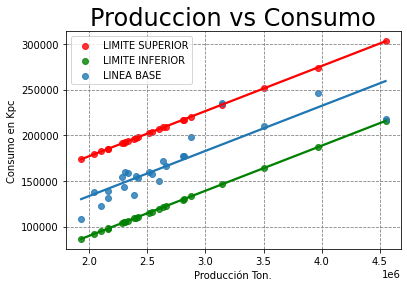

In [ ]:
fig, ax = plt.subplots()
sb.regplot(x='Producción Ton.', y='E+(x*Sy,x)', data=df_indefic_año1, ax=ax, color='r',label = "LIMITE SUPERIOR")
sb.regplot(x='Producción Ton.', y='E-(x*Sy,x)', data=df_indefic_año1, ax=ax, color='g',label = "LIMITE INFERIOR")
sb.regplot(x='Producción Ton.', y='Consumo en Kpc',ci=None, data=df_indefic_año1, ax=ax,label = "LINEA BASE")
ax.grid(axis = 'both', color = 'gray', linestyle = 'dashed')
ax.set_title( "Produccion vs Consumo" , size = 24 )
plt.legend()
plt.show()

In [ ]:
dffiltro1=dffiltro1.drop(['Ecalculado','E^2','Ei*Pi','E+(x*Sy,x)','E-(x*Sy,x)','(E+Sy,x)-Ei','Ei-(E-Sy,x)'],axis=1)

In [ ]:
x = dffiltro1['Producción Ton.']
y = dffiltro1['Consumo en Kpc']
slope5, intercept5, r_value5, p_value5, std_err5 = linregress(x, y)
r25 = r_value5**2
print("pendiente:",slope5) 
print("interseccion eje:", intercept5)
print("R2:", r25)

pendiente: 0.046503304816071865
interseccion eje: 40355.31859125616
R2: 0.8230871338053873


In [ ]:
dffiltro1['Consumo teorico']=(slope5*dffiltro1['Producción Ton.']+intercept5)


In [ ]:
dffiltro1['Real-Teorico']=dffiltro1['Consumo en Kpc']-dffiltro1['Consumo teorico']

In [ ]:
dffiltro1['Diferencia al cuadrado']=(dffiltro1['Real-Teorico'].clip(upper=0))**2


In [ ]:
print(dffiltro1)

     Año         Mes  Consumo en Kpc  Producción Ton.  Consumo teorico  \
0   1998       Enero          134880          2385730    151299.647990   
1   1998     Febrero          138240          2040070    135225.315647   
2   1998       Marzo          138480          2161680    140880.582546   
3   1998       Abril          122880          2103370    138168.974842   
4   1998        Mayo          155280          2401320    152024.634512   
5   1998       Junio          157920          2537565    158360.477277   
6   1998       Julio          159600          2303359    147469.124269   
7   1998      Agosto          177600          2811775    171112.148490   
8   1998  Septiembre          158880          2337090    149037.727244   
9   1998     Octubre          131040          2157733    140697.034002   
10  1998   Noviembre          143760          2300890    147354.307610   
11  1998   Diciembre          153840          2282175    146483.998260   
12  1999       Enero          150480  

In [ ]:
dfaux1=dffiltro1['Diferencia al cuadrado']
dfaux1

0     2.696048e+08
1     0.000000e+00
2     5.762797e+06
3     2.337528e+08
4     0.000000e+00
5     1.940202e+05
6     0.000000e+00
7     0.000000e+00
8     0.000000e+00
9     9.325831e+07
10    1.291905e+07
11    0.000000e+00
12    1.119018e+08
13    4.772499e+08
14    0.000000e+00
15    0.000000e+00
16    0.000000e+00
17    0.000000e+00
18    0.000000e+00
19    0.000000e+00
20    0.000000e+00
21    0.000000e+00
22    1.177764e+09
Name: Diferencia al cuadrado, dtype: float64

In [ ]:
dfaux1 = dfaux1.drop(dfaux1[dfaux1==0].index)
dfaux1.reset_index(drop=True, inplace=True)
val_neg1=dfaux1.shape[0]
val_neg1

9

In [ ]:
varianza1=(dfaux1.sum()/val_neg1)

In [ ]:
D_estandar1=varianza1**0.5
print("varianza= ",varianza1)
print("Des. Estandar= ",D_estandar1)


varianza=  264711892.32069534
Des. Estandar=  16269.969032567189


In [ ]:
dffiltro1['Linea meta'] = ((slope5*dffiltro1['Producción Ton.'])+D_estandar1) 


In [ ]:
print(dffiltro1)

     Año         Mes  Consumo en Kpc  Producción Ton.  Consumo teorico  \
0   1998       Enero          134880          2385730    151299.647990   
1   1998     Febrero          138240          2040070    135225.315647   
2   1998       Marzo          138480          2161680    140880.582546   
3   1998       Abril          122880          2103370    138168.974842   
4   1998        Mayo          155280          2401320    152024.634512   
5   1998       Junio          157920          2537565    158360.477277   
6   1998       Julio          159600          2303359    147469.124269   
7   1998      Agosto          177600          2811775    171112.148490   
8   1998  Septiembre          158880          2337090    149037.727244   
9   1998     Octubre          131040          2157733    140697.034002   
10  1998   Noviembre          143760          2300890    147354.307610   
11  1998   Diciembre          153840          2282175    146483.998260   
12  1999       Enero          150480  

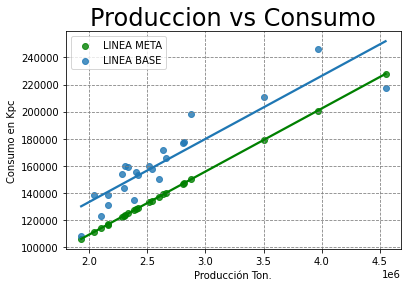

In [ ]:
fig, ax = plt.subplots()
sb.regplot(x='Producción Ton.', y='Linea meta', data=dffiltro1, ax=ax, color='g',label = "LINEA META")
sb.regplot(x='Producción Ton.', y='Consumo en Kpc',ci=None, data=dffiltro1, ax=ax,label = "LINEA BASE")
ax.grid(axis = 'both', color = 'gray', linestyle = 'dashed')
ax.set_title( "Produccion vs Consumo" , size = 24 )
plt.legend()
plt.show()

In [ ]:
# se calculan los datos del año 2 para el indicador de eficiencia en base 100

In [ ]:
df_indefic_año2['EL=mlb*Preal+E0LB']=(slope5*df_indefic_año2['Producción Ton.'])+intercept5

In [ ]:
df_indefic_año2['Em=mlm*Preal+E0Lm']=(slope5*df_indefic_año2['Producción Ton.'])+D_estandar1

In [ ]:
df_indefic_año2['lb100=(Elb/Ereal)*100']=(df_indefic_año2['EL=mlb*Preal+E0LB']/df_indefic_año2['Consumo en Kpc'])*100

In [ ]:
df_indefic_año2['lb100=(Elm/Ereal)*100']=(df_indefic_año2['Em=mlm*Preal+E0Lm']/df_indefic_año2['Consumo en Kpc'])*100

In [ ]:
df_indefic_año2.reset_index(drop=True, inplace=True)
tam=(df_indefic_año2.shape[0])
tam
naux=0

In [ ]:
tam

24

In [ ]:

while (naux<tam):
    df_indefic_año2.at[naux,'a']=naux
    df_indefic_año2['b']=100
    df_indefic_año2['c']=120
    df_indefic_año2['d']=80
    naux=naux+1
   
    

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


In [ ]:
print(df_indefic_año2)

     Año         Mes  Consumo en Kpc  Producción Ton.  EL=mlb*Preal+E0LB  \
0   1998       Enero          134880          2385730      151299.647990   
1   1998     Febrero          138240          2040070      135225.315647   
2   1998       Marzo          138480          2161680      140880.582546   
3   1998       Abril          122880          2103370      138168.974842   
4   1998        Mayo          155280          2401320      152024.634512   
5   1998       Junio          157920          2537565      158360.477277   
6   1998       Julio          159600          2303359      147469.124269   
7   1998      Agosto          177600          2811775      171112.148490   
8   1998  Septiembre          158880          2337090      149037.727244   
9   1998     Octubre          131040          2157733      140697.034002   
10  1998   Noviembre          143760          2300890      147354.307610   
11  1998   Diciembre          153840          2282175      146483.998260   
12  1999    

In [ ]:
# se grafica el indicador de eficiencia en base 100

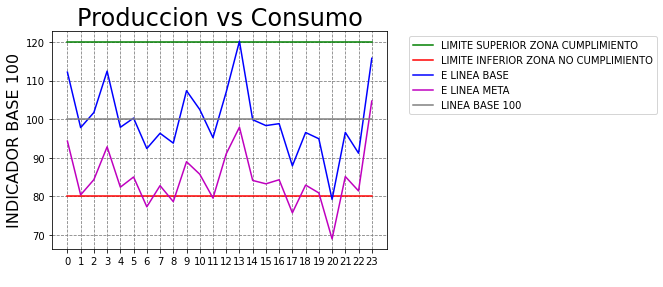

In [ ]:
fig, ax = plt.subplots()
sb.lineplot(x='a', y='c',ci=None, data=df_indefic_año2, ax=ax, color='g',label = "LIMITE SUPERIOR ZONA CUMPLIMIENTO")
sb.lineplot(x='a', y='d',ci=None, data=df_indefic_año2, ax=ax, color='r',label = "LIMITE INFERIOR ZONA NO CUMPLIMIENTO")
sb.lineplot(x='a', y='lb100=(Elb/Ereal)*100',ci=None, data=df_indefic_año2, ax=ax, color='b',label = "E LINEA BASE")
sb.lineplot(x='a', y='lb100=(Elm/Ereal)*100',ci=None, data=df_indefic_año2, ax=ax, color='m',label = "E LINEA META")
sb.lineplot(x='a', y='b',ci=None, data=df_indefic_año2, ax=ax, color='gray' ,label = "LINEA BASE 100")
ax.grid(axis = 'both', color = 'gray', linestyle = 'dashed')
ax.set_title( "Produccion vs Consumo" , size = 24 )
plt.xticks(range(0,naux,1))
plt.xlabel("X Label",color='w')
plt.ylabel("INDICADOR BASE 100", size = 16)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()